In [1]:
# 7.2 Exercise: Relationships Between Variables and Estimations

In [2]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Exercise 7-1
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

Solution:

Scatter plot is used to show the relationship between two variables.

In [3]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [4]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [5]:
import numpy as np


import thinkstats2
import thinkplot

Get the data of Mother's pregnancy age and total weight of a baby.
dropna drops rows with nan in any of the listed column,

In [6]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

ages = live.agepreg
weights = live.totalwgt_lb

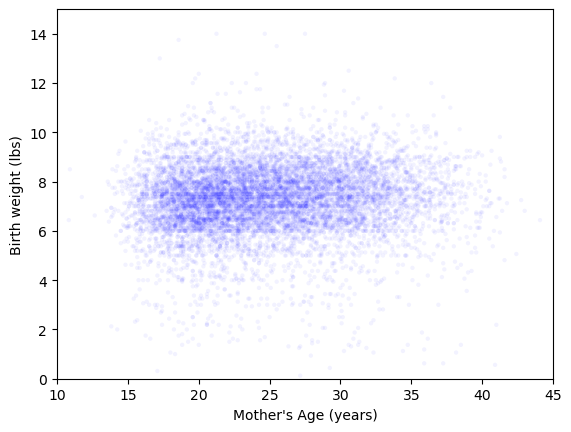

In [7]:
# Solution

thinkplot.Scatter(ages, weights, alpha=0.05, s=10)
thinkplot.Config(xlabel="Mother's Age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)

# Solution to plot percentiles of birth weight versus mother’s age.


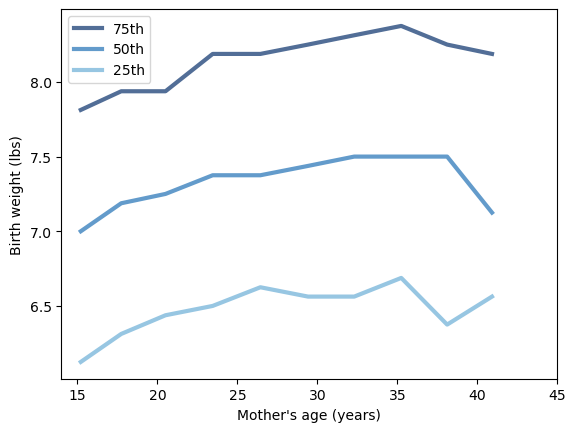

In [8]:
# Create a funtion to plot pecentile

def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    #arrange makes a NumPy array of bins from 10 to, but not including 48, in crements of 3.
    bins = np.arange(10, 48, 3)

    #digitize computes the index of the bin that contains each value in df.agepreg. 
    #Values that fall below the lowest bin are mapped to the index 0. Values above the highest bin are mapped to len(bins).
    indices = np.digitize(df.agepreg, bins)

    #groupby is a DataFrame method that returns a GroupBy object, used in a for loop,
    #groups iterates the names of the groups and the DataFrames that represent them
    groups = df.groupby(indices)

    # For each group we can compute mean age and CDF of the total weight
    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)

    # plot percentile of age vs weights
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[14, 45], legend=True)
    
BinnedPercentiles(live)

In [9]:
# Covariance is measure of the tendency of two variables to vary together
# The coefficient of correlation is a standardized version of covariance that is easier to interpret.

In [10]:
# Cov is the dot product of the deviation, divided by their length. conviance is maximized if the two vectors are identical, 
# 0 if they are orthogonal and negative of they point in opposite direction.
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

Correlation is a statistic intedened to quatify the strength of the relationship between two variables.

In [11]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

Spearman correlation test examines whether two variables are correlated with one another or not. 
The Spearman's test can be used to analyse ordinal level, as well as continuous level data, 
because it uses ranks instead of assumptions of normality.

Correlation coefficients describe the strength and direction of an association between variables. A Pearson correlation is a measure of a linear association between 2 normally distributed random variables. A Spearman rank correlation describes the monotonic relationship between 2 variables.

In [12]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [13]:
# Solution

print('Corr', Corr(ages, weights))
print('SpearmanCorr', SpearmanCorr(ages, weights))

Corr 0.06883397035410908
SpearmanCorr 0.09461004109658226


In [14]:
# Solution

# My conclusions:

# 1) The scatterplot shows a weak relationship between the variables but
#    it is hard to see clearly. 
# 2) Pearson Correlation: This measures the linear relationship between two variables. A value close to 0 indicates a very weak or no linear relationship.
 
# 3) Spearman Correlation: This assesses the monotonic relationship between two variables, capturing nonlinear but consistent associations.
    # A value near 0 suggests a weak monotonic relationship.

# Key Observations:
# Both measures indicate a weak association between the variables.
# Spearman's correlation is slightly higher, suggesting a small monotonic trend, but it’s still not strong.

## Exercise Page 99: 8-1
In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.g10 scale.

In [16]:
#Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

#The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

#The following function computes the mean error for a collection of estimates.

"MSE" stands for Mean Squared Error and "RMSE" stands for Root Mean Squared Error; both are metrics used to evaluate the accuracy of regression models by calculating the average difference between predicted values and actual values, with the key distinction being that RMSE is simply the square root of MSE, making it easier to interpret as it is in the same units as the target variable. 

Calculation:
To calculate MSE, you take the squared difference between each predicted value and its corresponding actual value, sum them up, and divide by the number of data points. RMSE is calculated by taking the square root of the MSE. 

Interpretation:
A lower MSE or RMSE indicates a better model fit, meaning the predictions are closer to the actual values. 

Impact of outliers:
Both MSE and RMSE are sensitive to outliers, meaning a single large error can significantly inflate the value of the metric. 

When to use which:
MSE: Preferred when you want to heavily penalize large errors, as squaring the differences gives more weight to bigger mistakes. 
RMSE: Generally preferred for most applications because it is easier to interpret as it is in the same units as the target variable. 

In [17]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [18]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [56]:
# Solution
import random
def Estimate4(n=7, iters=100000):
    """Mean error for xbar and median as estimators of population mean.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
Estimate4()

Experiment 1
mean error xbar 0.0005906392907154787
mean error median 0.001313110608747419


# Explanation
Mean Error (x̄):

Value: 0.00059 (rounded to 5 decimal places)
This represents the average error when using the mean (x̄) of a dataset as the central measure. It is typically calculated as the average difference between predicted and observed values. A value close to 0 indicates low error.
Mean Error (Median):

Value: 0.00131 (rounded to 5 decimal places)
This represents the average error when using the median as the central measure. Like the mean error, smaller values suggest lower deviation or error.

Observations:
Both errors are very close to zero, indicating a good fit or minimal error for either central tendency measure (mean or median).
The mean has a slightly smaller error (0.00059) compared to the median (0.00131), implying it might be a slightly better central measure for this specific dataset.

In [20]:
# Solution

def Estimate5(n=7, iters=100000):
    """RMSE for biased and unbiased estimators of population variance.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

Experiment 2
RMSE biased 0.5154526487063087
RMSE unbiased 0.5781107656740059


# Explanation:
RMSE (Biased):

Value: 0.51545 (rounded to 5 decimal places)
This RMSE assumes a biased estimator, meaning the model might slightly overfit or underfit the data. It typically does not adjust for potential bias in the data.
RMSE (Unbiased):

Value: 0.57811 (rounded to 5 decimal places)
This RMSE adjusts for bias, often by penalizing overfitting or correcting for systematic errors in the predictions. It’s generally more conservative compared to the biased RMSE.
Observations:
The biased RMSE is lower, suggesting the model might align more closely with the observed data but at the potential cost of overfitting.
The unbiased RMSE is slightly higher, likely due to adjustments for bias, which ensures a more generalized performance evaluation.
Use Case:
If you are evaluating a model for practical use, focus on the unbiased RMSE as it reflects performance on unseen data more reliably.
If you’re diagnosing the model's fit on the current dataset, the biased RMSE provides insight into how well the model adheres to the given data.

## Page 99: 8-2
# Exercise
Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n

standard error 0.9102794743686391
confidence interval (1.261082485203135, 3.8036746919746274)


0.9102794743686391

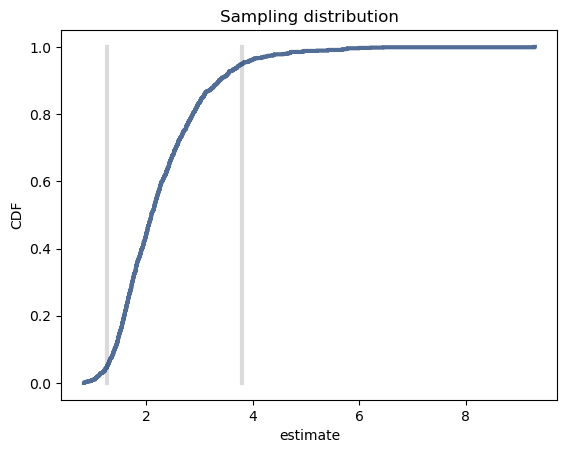

In [24]:
# Solution

def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

# My conclusions:

1. Standard Error (SE):
Value: 0.9103 (rounded to 4 decimal places)
The standard error measures the variability of the sample mean (or another statistic) if you were to repeatedly sample from the population.
A smaller SE indicates that the sample mean is a more precise estimate of the population mean.

2. Confidence Interval (CI):
Range: (1.2611, 3.8037) (rounded to 4 decimal places)
This interval gives a range of values where the true population parameter (e.g., the mean) is expected to lie with a certain level of confidence, typically 95%.

The width of the CI is influenced by the standard error, sample size, and confidence level.

Observations:
The wide interval suggests a moderate level of uncertainty about the population parameter.
The standard error and confidence interval are consistent with a scenario where the sample size might not be very large, leading to higher variability.